# 《编程基础》期末报告 代码
### 胡瑞扬 2024104079

### 数据加载与描述性展示

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns

import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['font.sans-serif']=['SimHei', 'Microsoft YaHei', 'STHeiti']  # 显示中文
matplotlib.rcParams['axes.unicode_minus'] = False  # 禁用Unicode负号，避免不能显示

# plotnine 显示中文，绘图后添加
# + theme(text=element_text(family="SimHei"))

In [3]:
# 加载数据集
data_path = "winequality-red-original.csv"
wine = pd.read_csv(data_path, sep=";")
df = wine.copy() # 下面使用副本操作

# 查看数据集的前几行
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# 查看数据的基本信息：数据类型和缺失值情况
df.info()

# 描述性统计列表
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### 数据可视化

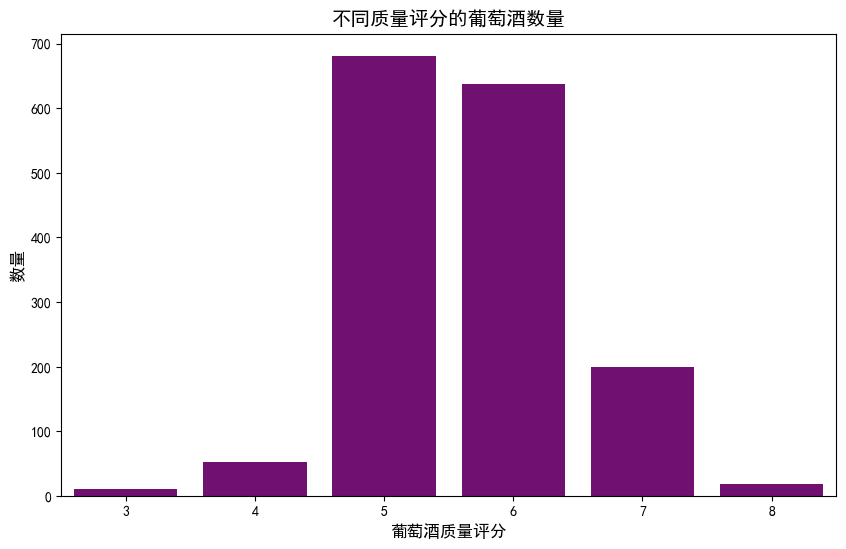

In [4]:
# 【条形图】：展示获得不同质量评分的葡萄酒数量
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=df, color='purple')
plt.title('不同质量评分的葡萄酒数量', fontsize=14)
plt.xlabel('葡萄酒质量评分', fontsize=12)
plt.ylabel('数量', fontsize=12)
plt.show()

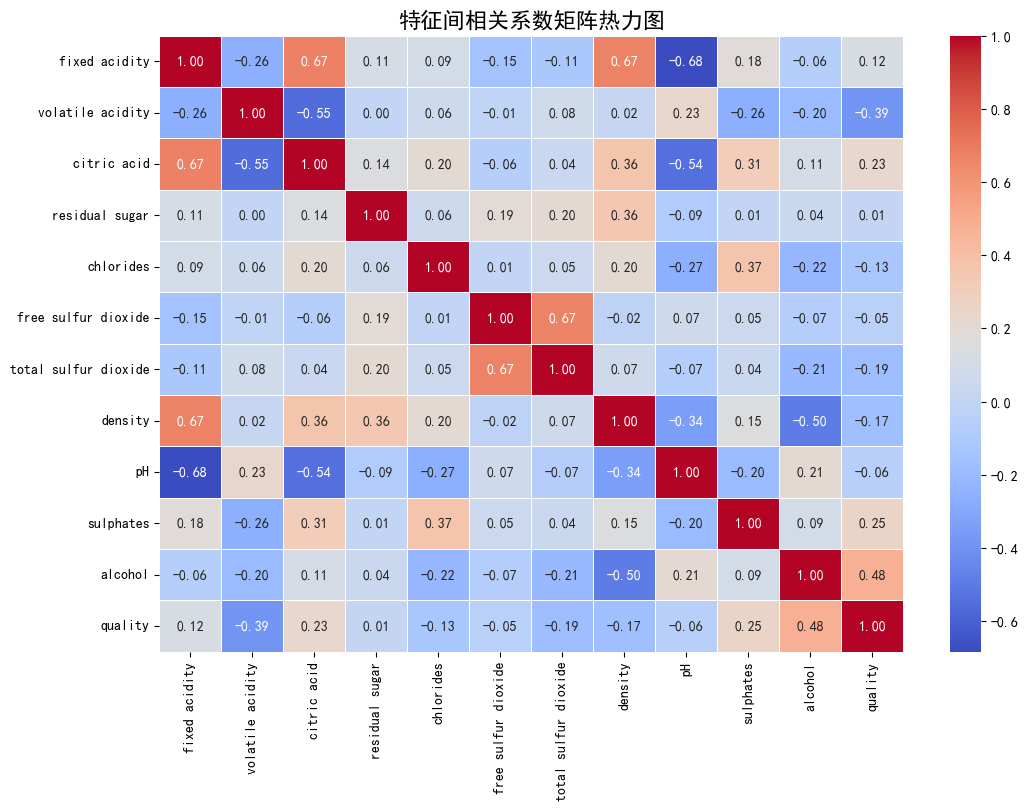

In [5]:
# 【热力图】：特征之间的相关性

# 计算相关矩阵
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('特征间相关系数矩阵热力图', fontsize=16)
plt.show()

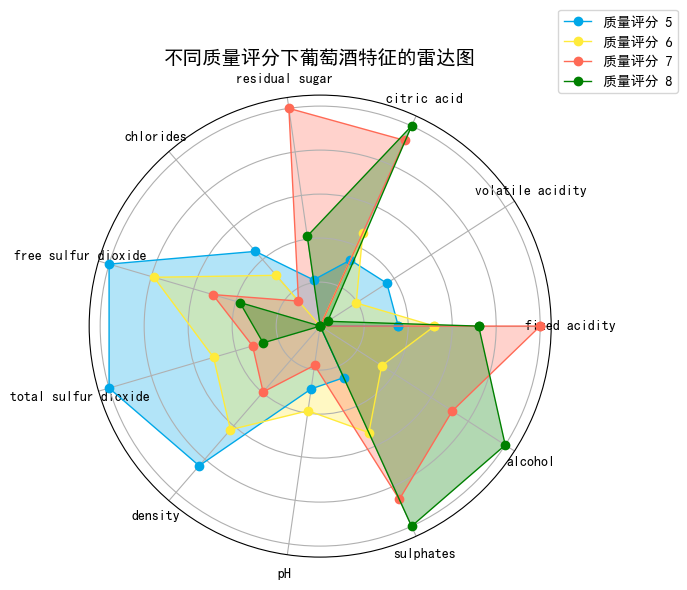

In [6]:
# 【雷达图】：对比评分5-8的葡萄酒在各指标上的表现

# 计算每个质量评分下特征的平均值
average = df.groupby('quality').mean()
# Min-Max标准化
df_normalized = average.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
labels = df_normalized.columns # 比较维度标签：11个物化指标

# 定义角度
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]  # 使第一个点与最后一个点相连

# 绘制雷达图
fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
color = ['#00A8E8', '#FFEB3B', '#FF6A56', 'green'] # 色板：水蓝#00A8E8 柠檬黄#FFEB3B 珊瑚红#FF6A56 墨绿green
i = 0

for score in df_normalized.index[2:6]: # 仅绘制得分5-8的雷达图
    values = df_normalized.loc[score].values.tolist()
    values += values[:1] # 首尾相连
    ax.fill(angles, values, color[i], alpha=0.3)
    ax.plot(angles, values, marker='o', markerfacecolor=color[i], markersize=6, color=color[i], linewidth=1, label='质量评分 '+str(score))
    i += 1

ax.set_yticklabels([])
ax.set_xticks(angles[:-1]) # 去掉首尾重合的最后一个标签
ax.set_xticklabels(labels, fontsize=10, rotation=45, horizontalalignment='center') 
ax.set_title('不同质量评分下葡萄酒特征的雷达图', fontsize=14)
ax.legend(bbox_to_anchor=(1, 1.2), loc='upper left')

plt.show()

### 特征选择

In [7]:
# 随机森林
from sklearn.ensemble import RandomForestClassifier

X = df.drop('quality', axis=1)  # 11个特征
y = df['quality']  # 目标变量

# 创建随机森林分类器
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y) 
# 获取特征重要性
rf_importance = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['importance'])
rf_importance = rf_importance.sort_values('importance', ascending=False)

print(rf_importance)

                      importance
alcohol                 0.151698
sulphates               0.112402
total sulfur dioxide    0.103722
volatile acidity        0.100606
density                 0.088905
chlorides               0.078535
fixed acidity           0.075535
pH                      0.075392
citric acid             0.074150
residual sugar          0.072882
free sulfur dioxide     0.066172


In [4]:
# XGBoost
import xgboost as xgb

X = df.drop('quality', axis=1)
y = df['quality']-3 # 默认多分类标记应从0开始，这里是3-8，-3后对应0-5

# 创建 XGBoost 分类器
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X, y)

# 获取特征重要性
xgb_importance = pd.DataFrame(xgb_model.feature_importances_, index=X.columns, columns=['importance'])
xgb_importance = xgb_importance.sort_values('importance', ascending=False)

print(xgb_importance)

                      importance
alcohol                 0.202469
sulphates               0.104799
volatile acidity        0.095533
total sulfur dioxide    0.094087
residual sugar          0.081337
pH                      0.077396
free sulfur dioxide     0.073047
fixed acidity           0.071521
citric acid             0.071236
chlorides               0.068616
density                 0.059959


In [9]:
# 字典合并 求平均
combined_importance = {feature: (rf_importance.get(feature, 0) + xgb_importance.get(feature, 0)) / 2
                       for feature in set(rf_importance) | set(xgb_importance)}

# 合并后的结果转换为DataFrame并排序
importance_df = pd.DataFrame.from_dict(combined_importance)
importance_df = importance_df.sort_values(by='importance', ascending=False)

print(importance_df)

                      importance
alcohol                 0.177084
sulphates               0.108600
total sulfur dioxide    0.098905
volatile acidity        0.098070
residual sugar          0.077110
pH                      0.076394
density                 0.074432
chlorides               0.073576
fixed acidity           0.073528
citric acid             0.072693
free sulfur dioxide     0.069610


### 评分预测模型构建与训练

In [10]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score, classification_report, confusion_matrix
import logging
import os
from datetime import datetime

class WineQualityPredictor:
    def __init__(self, data):
        self.data = data
        self.X = None
        self.y = None
        self.X_scaled = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.models = {}

    def setup_logging(self, log_dir="logs"):
        """设置 logging 配置并保存日志到文件"""
        # 确保日志文件夹存在
        if not os.path.exists(log_dir):
            os.makedirs(log_dir)
        # 使用时间戳创建一个唯一的日志文件名
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        log_filename = os.path.join(log_dir, f"wine_predictor_{timestamp}.log")
        # 获取根日志记录器
        logger = logging.getLogger() 
        # 移除所有现有的 handlers，防止重复日志
        for handler in logger.handlers[:]:
            logger.removeHandler(handler)
        # 设置日志级别
        logger.setLevel(logging.INFO)
        # 创建文件处理器和控制台处理器
        file_handler = logging.FileHandler(log_filename, mode='w')
        stream_handler = logging.StreamHandler()
        # 设置日志输出格式
        formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
        file_handler.setFormatter(formatter)
        stream_handler.setFormatter(formatter)
        # 将处理器添加到 logger
        logger.addHandler(file_handler)
        logger.addHandler(stream_handler)
        # 输出日志文件信息
        logging.info(f"Logging started, log file: {log_filename}")

    def load_data(self):
        """加载数据并处理变量"""
        try:
            logging.info("Loading dataset...")
            data = self.data
            self.X = data.drop("quality", axis=1)
            self.y = data["quality"]
            logging.info("Dataset loaded successfully.")
        except Exception as e:
            logging.error(f"Error loading data: {e}")
            raise ValueError("Data loading failed") from e
        
    def preprocess_data(self):
        """数据预处理：标准化"""
        try:
            logging.info("Preprocessing data...")
            scaler = StandardScaler()
            self.X_scaled = scaler.fit_transform(self.X)
            logging.info("Data preprocessing completed.")
        except Exception as e:
            logging.error(f"Error in preprocessing data: {e}")
            raise ValueError("Data preprocessing failed") from e
        
    def split_data(self, test_size=0.2, random_state=42):
        """根据quality列 分层划分训练集和测试集"""
        try:
            logging.info(f"Splitting data into train and test sets with test_size={test_size}...")
            # 使用 stratify 参数确保各个类别按照比例划分
            self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
                self.X_scaled, self.y, test_size=test_size, random_state=random_state, stratify=self.y)
            logging.info("Data split successfully with stratification.")
        except Exception as e:
            logging.error(f"Error in splitting data: {e}")
            raise ValueError("Data splitting failed") from e
        
    def train_svm(self):
        """训练SVM分类模型并调参"""
        try:
            logging.info("Training SVM classification model...")
            # 创建SVM分类模型
            svm_model = SVC(class_weight='balanced', random_state=42) 
            # 设置参数网格
            svm_param_grid = {
                'C': [8, 12, 15, 18],              # 正则化参数，控制对模型的惩罚程度 10 15
                'gamma': ['scale', 'auto'],     # 核函数的系数，用于非线性转换 auto scale
                'kernel': ['linear', 'rbf']     # 核函数类型（线性核和径向基核）rbf rbf
            }
            # 使用网格搜索进行超参数调优
            grid_search = GridSearchCV(svm_model, svm_param_grid, cv=5, n_jobs=-1)  # 网格搜索调参
            grid_search.fit(self.X_train, self.y_train)  # 训练模型
            # 保存最佳模型
            self.models['svm'] = grid_search.best_estimator_

            # 交叉验证：计算准确率（accuracy）
            cv_scores = cross_val_score(grid_search.best_estimator_, self.X_train, self.y_train, cv=5, scoring='accuracy')   
            # 打印日志信息
            logging.info(f"SVM classification model trained successfully with parameters: {grid_search.best_params_}, the best score is {grid_search.best_score_}")
            logging.info(f"Cross-Validation Accuracy for SVM: {cv_scores.mean()}")  # 输出交叉验证的平均准确率

        except Exception as e:
            logging.error(f"Error training SVM model: {e}")
            raise ValueError("SVM model training failed") from e
        
    def train_rf(self):
        """训练随机森林分类模型并调参"""
        try:
            logging.info("Training Random Forest classification model...")
            rf_model = RandomForestClassifier(class_weight='balanced', random_state=42) 

            # 设置参数网格
            rf_param_grid = {
                'n_estimators': [50, 100, 150],  # 树的数量 100
                'max_depth': [15, 20, 25, None],   # 树的最大深度，避免过拟合 20
                'min_samples_split': [2, 3, 5],   # 每个内部节点的最小样本数 2
                'min_samples_leaf': [1, 2, 5],     # 每棵树叶子节点的最小样本数 1
                'oob_score': [True],              # 使用袋外样本
            }           
            # 使用网格搜索进行超参数调优
            grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, n_jobs=-1)  # 使用网格搜索调参
            grid_search.fit(self.X_train, self.y_train)  # 进行模型训练并自动调参
            self.models['rf'] = grid_search.best_estimator_

            # 交叉验证：计算准确率（accuracy）
            cv_scores = cross_val_score(grid_search.best_estimator_, self.X_train, self.y_train, cv=5, scoring='accuracy')

            # 输出训练结果
            logging.info(f"Random Forest classification model trained successfully with parameters: {grid_search.best_params_}, the best score is {grid_search.best_score_}")
            logging.info(f"Cross-Validation Accuracy for RF: {cv_scores.mean()}")  # 输出交叉验证的平均准确率

        except Exception as e:
            logging.error(f"Error training Random Forest model: {e}")
            raise ValueError("Random Forest model training failed") from e
        
    def evaluate_model(self, model_name):
        """评估模型性能"""
        try:
            model = self.models.get(model_name)
            if not model:
                raise ValueError(f"Model {model_name} is not found.")
            y_pred = model.predict(self.X_test)

            # 计算分类任务的准确率
            accuracy = accuracy_score(self.y_test, y_pred)
            logging.info(f"Accuracy for {model_name}: {accuracy}")

            # 计算分类任务的 MAE
            # MAE 计算方式：预测值与真实值的绝对差异的均值
            mae = mean_absolute_error(self.y_test, y_pred)
            logging.info(f"MAE for {model_name}: {mae}")

            # 生成分类报告（包括精确率、召回率和 F1 分数）
            class_report = classification_report(self.y_test, y_pred, zero_division=0)
            logging.info(f"Classification Report for {model_name}:\n{class_report}")

            # 混淆矩阵
            conf_matrix = confusion_matrix(self.y_test, y_pred)
            logging.info(f"Confusion Matrix for {model_name}:\n{conf_matrix}")

            return accuracy, mae, class_report, conf_matrix

        except Exception as e:
            logging.error(f"Error in evaluating {model_name}: {e}")
            raise ValueError(f"Evaluation of {model_name} failed") from e  

    def compare_models(self):
        """比较不同模型的效果"""
        try:
            logging.info("Comparing models...")
            comparison_results = {}
            for model_name in self.models.keys():
                accuracy, mae, class_report, conf_matrix = self.evaluate_model(model_name)
                comparison_results[model_name] = {'accuracy': accuracy, 'MAE': mae, 'class_report': class_report, 'conf_matrix': conf_matrix}
            return pd.DataFrame(comparison_results).T
        except Exception as e:
            logging.error(f"Error comparing models: {e}")
            raise ValueError("Model comparison failed") from e
        
    def predict_new_data(self, new_data):
        """使用训练好的模型对新数据进行预测"""
        try:
            # 对新数据进行标准化
            logging.info("Predicting new data...")
            scaler = StandardScaler()
            new_data_scaled = scaler.fit_transform(new_data)
            for model_name, model in self.models.items():
                predicted_values = model.predict(new_data_scaled)
                # 将预测结果添加到 new_data DataFrame 中，列名为模型名称
                new_data[model_name + '_Prediction'] = predicted_values
            logging.info("Predictions added to new data and saved to 'new_data_with_predictions.csv'")
            return new_data
        except Exception as e:
            logging.error(f"Error predicting new data: {e}")
            raise ValueError("Prediction for new data failed") from e


### 模型评估与预测

In [11]:
# 使用WineQualityPredictor类进行实验
def main():
    data_path = "winequality-red.csv"
    wine = pd.read_csv(data_path, sep=";")
    wine_predictor = WineQualityPredictor(wine)
    
    try:
        # 设置日志文件
        wine_predictor.setup_logging("logs")
        # 数据加载、预处理、划分
        wine_predictor.load_data()
        wine_predictor.preprocess_data()
        wine_predictor.split_data()

        # 模型训练
        wine_predictor.train_svm()
        wine_predictor.train_rf()

        # 比较模型
        comparison_results = wine_predictor.compare_models()
        print(comparison_results)

        # 读入新的葡萄酒数据
        winenew = pd.read_csv("winequality-new.csv", sep=";")
        new_data = winenew.drop(['quality'], axis=1)

        # 为新数据做预测，得到预测文件
        predictions = wine_predictor.predict_new_data(new_data)
        predictions['actual_scores'] = winenew['quality'] # 加入原始评分
        predictions.index = predictions.index + 1 # 令索引从1开始
        predictions.to_csv('winequality-predictions.csv', index=True, index_label='id', sep=';')        

    except Exception as e:
        logging.error(f"An error occurred: {e}")

# 运行主函数
if __name__ == "__main__":
    main()
    logging.shutdown() # 写入训练日志

2024-12-21 15:00:23,143 - INFO - Logging started, log file: logs\wine_predictor_20241221_150023.log
2024-12-21 15:00:23,145 - INFO - Loading dataset...
2024-12-21 15:00:23,148 - INFO - Dataset loaded successfully.
2024-12-21 15:00:23,150 - INFO - Preprocessing data...
2024-12-21 15:00:23,155 - INFO - Data preprocessing completed.


2024-12-21 15:00:23,157 - INFO - Splitting data into train and test sets with test_size=0.2...
2024-12-21 15:00:23,165 - INFO - Data split successfully with stratification.
2024-12-21 15:00:23,166 - INFO - Training SVM classification model...
2024-12-21 15:00:34,947 - INFO - SVM classification model trained successfully with parameters: {'C': 15, 'gamma': 'scale', 'kernel': 'rbf'}, the best score is 0.5840637450199203
2024-12-21 15:00:34,951 - INFO - Cross-Validation Accuracy for SVM: 0.5840637450199203
2024-12-21 15:00:34,952 - INFO - Training Random Forest classification model...
2024-12-21 15:01:16,873 - INFO - Random Forest classification model trained successfully with parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100, 'oob_score': True}, the best score is 0.6964143426294822
2024-12-21 15:01:16,875 - INFO - Cross-Validation Accuracy for RF: 0.6964143426294822
2024-12-21 15:01:16,876 - INFO - Comparing models...
2024-12-21 15:01:16,931

     accuracy       MAE                                       class_report  \
svm  0.589172  0.464968                precision    recall  f1-score   ...   
rf   0.675159  0.343949                precision    recall  f1-score   ...   

                                           conf_matrix  
svm  [[0, 1, 0, 1, 0, 0], [0, 3, 6, 2, 0, 0], [0, 1...  
rf   [[0, 1, 1, 0, 0, 0], [0, 0, 10, 1, 0, 0], [0, ...  


### 预测效果可视化

In [2]:
# 对预测后文件进行可视化
wine_pred = pd.read_csv("winequality-predictions.csv", sep=";")

# 提取需要的列
index = wine_pred['id']
svm_Prediction = wine_pred['svm_Prediction']
rf_Prediction = wine_pred['rf_Prediction']
actual_scores = wine_pred['actual_scores']

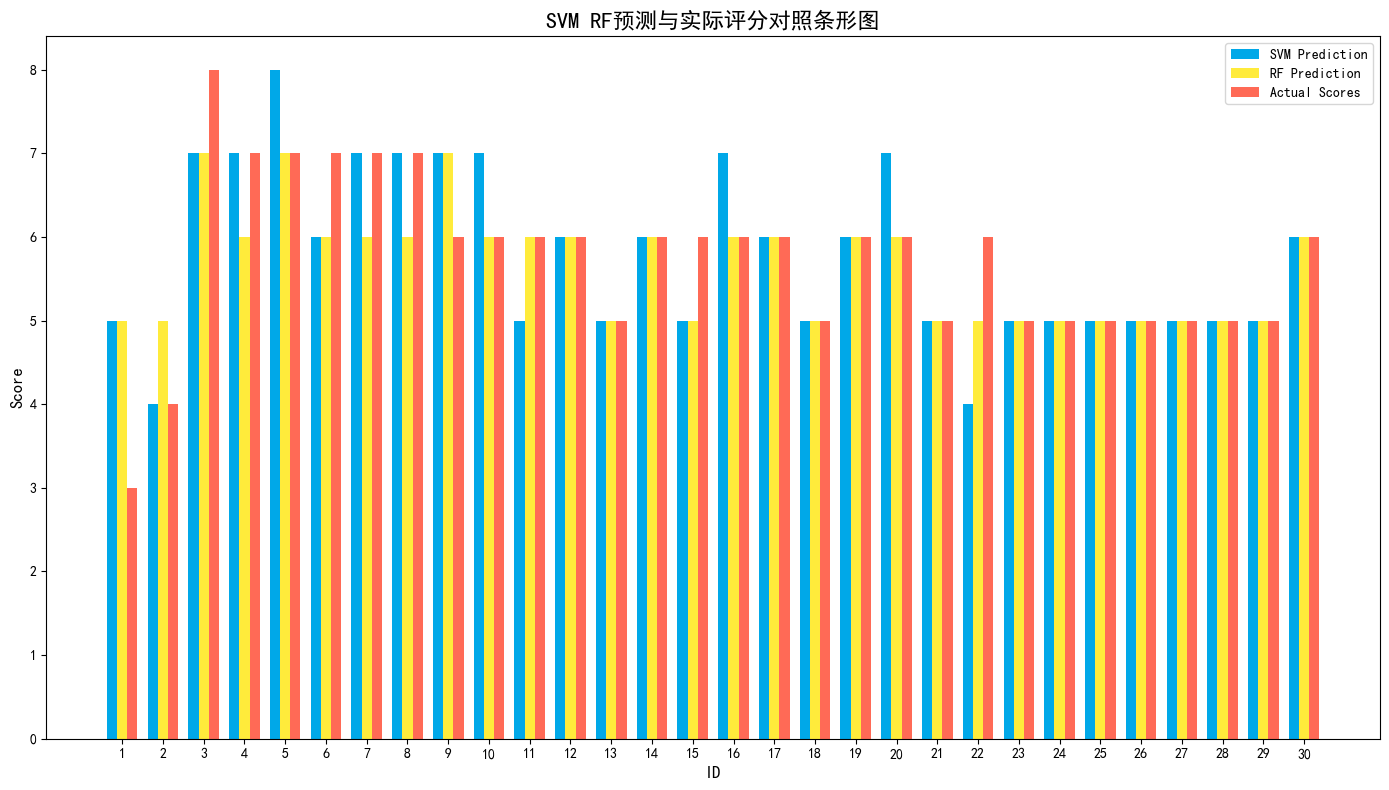

In [3]:
# 对预测后数据可视化

plt.figure(figsize=(14, 8))
# 条形图的宽度和间距
bar_width = 0.25

# 绘制三组条形图：svm、rf 和 actual    
plt.bar(index - bar_width, svm_Prediction, bar_width, label='SVM Prediction', color='#00A8E8') #水蓝#00A8E8
plt.bar(index, rf_Prediction, bar_width, label='RF Prediction', color='#FFEB3B') #柠檬黄#FFEB3B 
plt.bar(index + bar_width, actual_scores, bar_width, label='Actual Scores', color='#FF6A56') #珊瑚红#FF6A56

plt.xlabel('ID', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('SVM RF预测与实际评分对照条形图', fontsize=16)
plt.xticks(index, index)
plt.legend()
plt.tight_layout() # 自动调整布局，避免标签重叠

plt.show()
